In [1]:
print("hello world")

hello world


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
from nltk.tokenize import word_tokenize


In [20]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/P2510670/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/P2510670/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
import gdown

# For the test dataset
gdown.download_folder('https://drive.google.com/drive/folders/1i1Gz5wkcuPyJqDa2nzjd21DfWE2W_7xH?usp=sharing', quiet=False)

# For the train dataset
gdown.download_folder('https://drive.google.com/drive/folders/137N8KefqxccdnAmCfxSdaJYRN3pBDSZ5?usp=sharing', quiet=False)


Retrieving folder contents


Processing file 1JoLklqmArq0UioKrDKUi13BcLstZT_fK [Updated] Question Answer Classification Dataset[Test].csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1JoLklqmArq0UioKrDKUi13BcLstZT_fK
To: /home/P2510670/440_project/ml-nn-text-classification-comparison/test/[Updated] Question Answer Classification Dataset[Test].csv
100%|██████████| 35.5M/35.5M [00:00<00:00, 41.5MB/s]
Download completed
Retrieving folder contents


Processing file 1eIx0dqsRvOo6VPzp3W4QEqisbAel_gMH Question Answer Classification Dataset 5[Training].csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1eIx0dqsRvOo6VPzp3W4QEqisbAel_gMH
From (redirected): https://drive.google.com/uc?id=1eIx0dqsRvOo6VPzp3W4QEqisbAel_gMH&confirm=t&uuid=5adb5acc-c63e-42ed-b409-2ac92e511ae6
To: /home/P2510670/440_project/ml-nn-text-classification-comparison/train/Question Answer Classification Dataset 5[Training].csv
100%|██████████| 165M/165M [00:02<00:00, 76.1MB/s] 
Download completed


['/home/P2510670/440_project/ml-nn-text-classification-comparison/train/Question Answer Classification Dataset 5[Training].csv']

In [6]:
import pandas as pd

# Load the dataset with the correct paths
test_data = pd.read_csv('/home/P2510670/440_project/ml-nn-text-classification-comparison/test/[Updated] Question Answer Classification Dataset[Test].csv')
train_data = pd.read_csv('/home/P2510670/440_project/ml-nn-text-classification-comparison/train/Question Answer Classification Dataset 5[Training].csv')

# Show the data
print(test_data.head())
print(train_data.head())



                                             QA Text                  Class
0  Question Title:\nWhy does Zebras have stripes?...  Science & Mathematics
1  Question Title:\nWhat did the itsy bitsy sipde...  Education & Reference
2  Question Title:\nWhat is the difference betwee...  Education & Reference
3  Question Title:\nWhy do women get PMS?\nQuesti...                 Health
4  Question Title:\nIf your co-worker is guilty o...                 Health
                                             QA Text                  Class
0  Question Title:\ni am good at web design amate...     Business & Finance
1  Question Title:\nMy daughter wants to be a Med...  Education & Reference
2  Question Title:\nIs brother Jesus our brother ...      Society & Culture
3  Question Title:\nwhat is I-20?\nQuestion Conte...  Education & Reference
4  Question Title:\nwhat is a data disk?\nQuestio...   Computers & Internet


In [7]:
# Check data types for test dataset
print("Test Data Types:")
print(test_data.dtypes)

# Check data types for train dataset
print("\nTrain Data Types:")
print(train_data.dtypes)


Test Data Types:
QA Text    object
Class      object
dtype: object

Train Data Types:
QA Text    object
Class      object
dtype: object


EDA

In [8]:
# Shape of the data
print("Shape of Test Data:", test_data.shape)
print("Shape of Train Data:", train_data.shape)


Shape of Test Data: (59999, 2)
Shape of Train Data: (280003, 2)


In [9]:
train_data['Class'].value_counts()

Class
Entertainment & Music     28267
Health                    28186
Sports                    28074
Science & Mathematics     28039
Computers & Internet      27980
Education & Reference     27972
Business & Finance        27953
Family & Relationships    27905
Society & Culture         27881
Politics & Government     27746
Name: count, dtype: int64

In [10]:
test_data['Class'].value_counts()


Class
Science & Mathematics     6000
Education & Reference     6000
Health                    6000
Computers & Internet      6000
Entertainment & Music     6000
Business & Finance        6000
Society & Culture         6000
Politics & Government     6000
Sports                    6000
Family & Relationships    5999
Name: count, dtype: int64

In [11]:
train_data.isnull().sum()

QA Text    0
Class      0
dtype: int64

In [12]:
test_data.isnull().sum()

QA Text    0
Class      0
dtype: int64

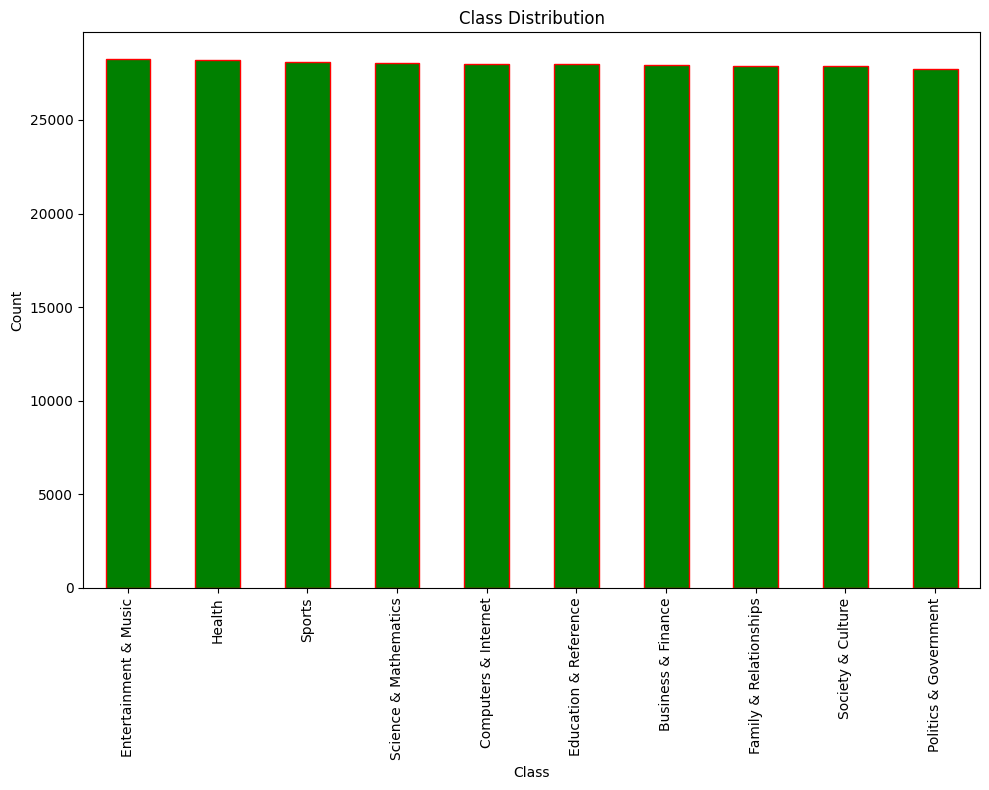

In [13]:
class_plot = train_data['Class'].value_counts()
plt.figure(figsize=(10,8))
class_plot.plot(kind='bar', color='green', edgecolor='red')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

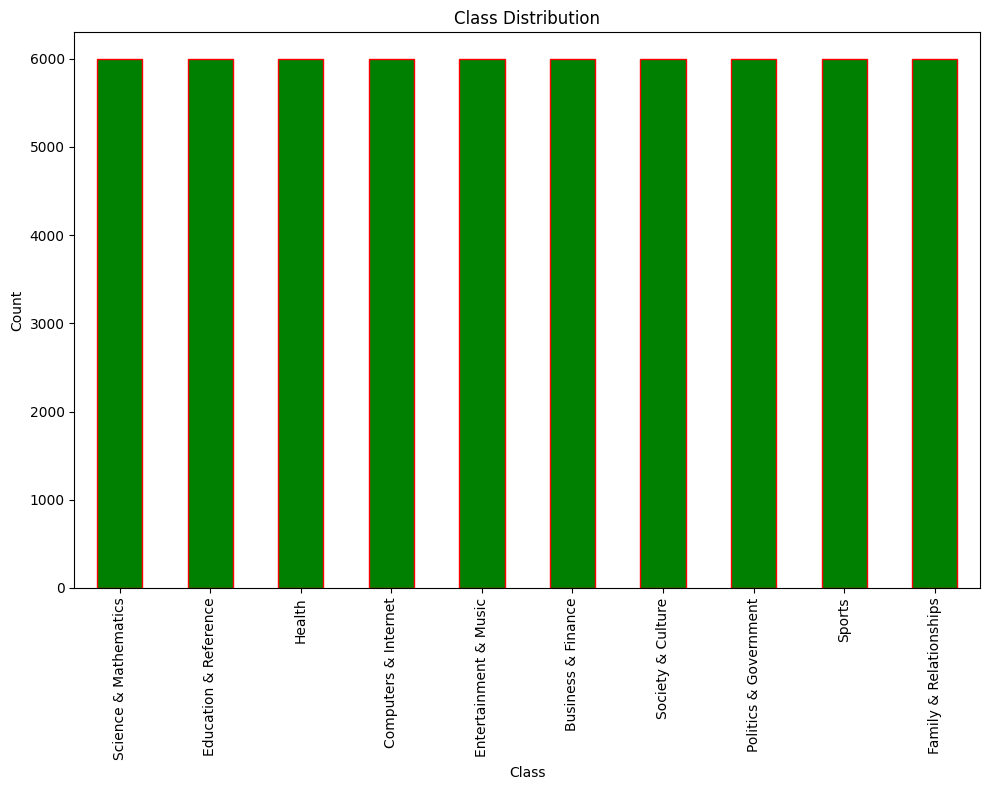

In [14]:
class_plot = test_data['Class'].value_counts()
plt.figure(figsize=(10,8))
class_plot.plot(kind='bar', color='green', edgecolor='red')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
train_data['QA Text'].isnull().sum()

np.int64(0)

In [10]:
# text = ' '.join(data['QA Text'].astype(str))
# wordcloud = WordCloud(width=1600, height=900, background_color='white').generate(text)

# plt.figure(figsize=(12,8))

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [16]:
train_data.tail(5)

,QA Text,Class
279998,Question Title:\nWhat is the best way to learn...,Education & Reference
279999,Question Title:\nWhat is the current payroll o...,Sports
280000,Question Title:\nWhat's your opinion on the ba...,Sports
280001,Question Title:\nWhat do you think will happen...,Society & Culture
280002,Question Title:\nwhat am i thinking right now?...,Business & Finance


Basic Preprocessing

In [17]:
train_data['QA Text'] = train_data['QA Text'].str.lower()

In [18]:
train_data['QA Text'] = train_data['QA Text'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

In [21]:
train_data['QA Text'] = train_data['QA Text'].apply(lambda x: word_tokenize(x))

In [ ]:
stop_words = set(stopwords.words('english'))
train_data['QA Text'] = train_data['QA Text'].apply(lambda x: [word for word in x if word not in stop_words])


In [22]:
train_data['QA Text'].head()

0    [question, title, i, am, good, at, web, design...
1    [question, title, my, daughter, wants, to, be,...
2    [question, title, is, brother, jesus, our, bro...
3    [question, title, what, is, i20, question, con...
4    [question, title, what, is, a, data, disk, que...
Name: QA Text, dtype: object

In [17]:
all_tokens = [word for text in data['QA Text'] for word in text]

In [18]:
word_freq = Counter(all_tokens)
commom_10_words = [word for word, count in word_freq.most_common(10)]
print(commom_10_words)

['question', 'best', 'answer', 'title', 'content', 'like', 'get', 'would', 'one', 'know']
